## Datasets vorbereiten: _Iris Dataset_
### Randomizen des Iris Datasets
Liest die Daten von Iris ein, ohne den Zeilenumbruch am Ende.

In [27]:
import numpy as np

with open("iris.data") as file:
    lines = [i[:-1] for i in file.readlines()] 

Es wird ein Label Vektor für das Datenset erstellt.

In [28]:
labelVector = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
# sucht nach dem letzten wort in lines pro Reihe und nimmt das im Bezug auf label als Zahl(index)
labels = [labelVector.index(i.split(",")[-1]) for i in lines if i!= ""]
# spart hier daten, da der Vektor sehr klein ist
labels = np.array(labels, dtype = "uint8")

Erstellt ein array aus den Werten des Datensets

In [29]:
features = [[float(j) for j in i.split(",")[:-1]] for i in lines if i!=""]
features = np.array(features)

Durchmischen der Reihenfolge

In [30]:
i = np.argsort(np.random.random(features.shape[0]))
labels = labels[i]
features = features[i]

In [31]:
np.save("iris_features.npy", features)
np.save("iris_labels.npy", labels)

## _Brustkrebs Dataset_
### Einlesen des Datensets

In [2]:
import numpy as np
import matplotlib.pyplot as plt

with open("wdbc.data") as file:
    lines = [i[:-1] for i in file.readlines() if i!=""]

### Konvertieren des Datensets in Label und Features

In [13]:
labelVector = ["B", "M"]
labels = np.array([labelVector.index(i.split(",")[1]) for i in lines], dtype = "uint8")
features = np.array([[float(j) for j in i.split(",")[2:]] for i in lines])
randomIndex = np.argsort(np.random.random(labels.shape[0]))
labels = labels[randomIndex]
features = features[randomIndex]
standardizedFeatures = (features - features.mean(axis = 0)) / features.std(axis = 0)

### Speichern der Label und Features und plotten von z

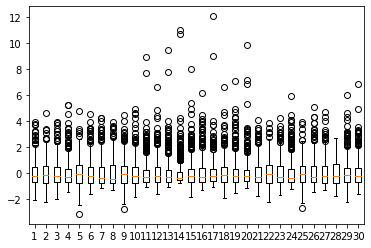

In [14]:
np.save("bc_features.npy", features)
np.save("bc_features_standard.npy", standardizedFeatures)
np.save("bc_labels.npy", labels)
plt.boxplot(standardizedFeatures)
plt.show()

## _MNIST Digits Dataset_
Diesmal wird das set direkt aus Keras geladen und ist somit schonmal richtig formatiert. Danach geht es weiter wie oben.

In [17]:
import numpy as np
import keras
from keras.datasets import mnist

(featuresTraining, labelsTraining), (featuresTest, labelsTest) \
    = mnist.load_data()
rdmIndex = np.argsort(np.random.random(labelsTraining.shape[0]))
featuresTraining = featuresTraining[rdmIndex]
labelsTraining = labelsTraining[rdmIndex]
rdmIndexTest = np.argsort(np.random.random(labelsTest.shape[0]))
featuresTest = featuresTest[rdmIndexTest]
labelsTest = labelsTest[rdmIndexTest]


In [19]:
np.save("mnist_train_images.npy", featuresTraining)
np.save("mnist_train_labels.npy", labelsTraining)
np.save("mnist_test_images.npy", featuresTest)
np.save("mnist_test_labels.npy", labelsTest)

Die Sets werden in Vektoren umgewandelt und gespeichert. (für spätere Zwecke)

In [23]:
featTrainingVector = featuresTraining.reshape((60000,28*28))
featTestVector = featuresTest.reshape((10000, 28*28))
np.save("mnist_train_vectors.npy", featTrainingVector)
np.save("mnist_test_vectors.npy", featTestVector)

In [26]:
rdmIndex = np.argsort(np.random.random(28*28))
for i in range(60000):
    featTrainingVector[i,:] = featTrainingVector[i,rdmIndex]
for i in range(10000):
    featTestVector[i,:] = featTestVector[i,rdmIndex]
np.save("mnist_train_scrambled_vectors.npy", featTrainingVector)
np.save("mnist_test_scrambled_vecotrs.npy", featTestVector)

Im nächsten Schritt wird das Aufbrechen der Bilder in einen Vector rückgängig gemacht, wobei die Reihenfolge weiterhin randomisiert ist.

In [27]:
scrambledImages = np.zeros((60000, 28, 28))
for i in range(60000):
    scrambledImages[i,:,:] = featTrainingVector[i,:].reshape((28,28))
np.save("mnist_train_scrambled_images.npy", scrambledImages)
scrambledImages = np.zeros((10000, 28, 28))
for i in range(10000):
    scrambledImages[i,:,:] = featTestVector[i,:].reshape((28,28))
np.save("mnist_train_scrambled_images.npy", scrambledImages)

## _CIFAR-10 Dataset_
Nochmal das gleiche von Oben. (in unübersichtlich)

In [28]:
import numpy as np
import keras
from keras.datasets import cifar10

(xtrn, ytrn), (xtst, ytst) = cifar10.load_data()
idx = np.argsort(np.random.random(ytrn.shape[0]))
xtrn = xtrn[idx]
ytrn = ytrn[idx]
idx = np.argsort(np.random.random(ytst.shape[0]))
xtst = xtst[idx]
ytst = ytst[idx]

np.save("cifar10_train_images.npy", xtrn)
np.save("cifar10_train_labels.npy", ytrn)
np.save("cifar10_test_images.npy", xtst)
np.save("cifar10_test_labels.npy", ytst)

xtrnv = xtrn.reshape((50000, 32*32*3))
xtstv = xtst.reshape((10000, 32*32*3))
np.save("cifar10_train_vectors.npy", xtrnv)
np.save("cifar10_test_vectors.npy", xtstv)

170508288/170498071 [==============================] - 29s 0us/step
